In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [17]:
df = pd.read_csv("C:\\Users\\spand\\Downloads\\archive.zip")

In [27]:
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)  

In [21]:
label_encoders = {}
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [23]:
X = df.drop('income', axis=1)  # Features
y = df['income']  

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [35]:
y_pred_lr = lr.predict(X_test_scaled)
acc_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", round(acc_lr * 100, 2), "%")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 81.78 %
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4533
           1       0.72      0.44      0.55      1500

    accuracy                           0.82      6033
   macro avg       0.78      0.69      0.72      6033
weighted avg       0.81      0.82      0.80      6033



In [37]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", round(acc_rf * 100, 2), "%")

Random Forest Accuracy: 84.85 %


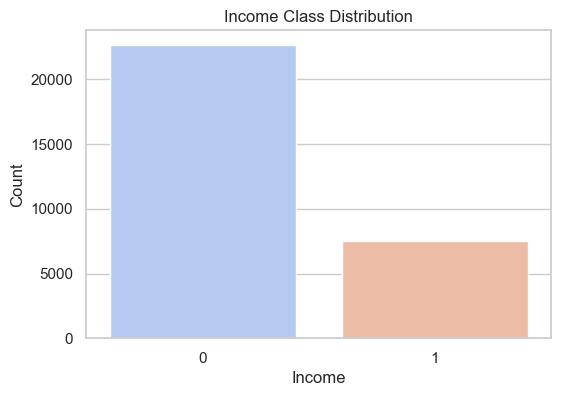

In [45]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='income', palette='coolwarm')
plt.title("Income Class Distribution")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()


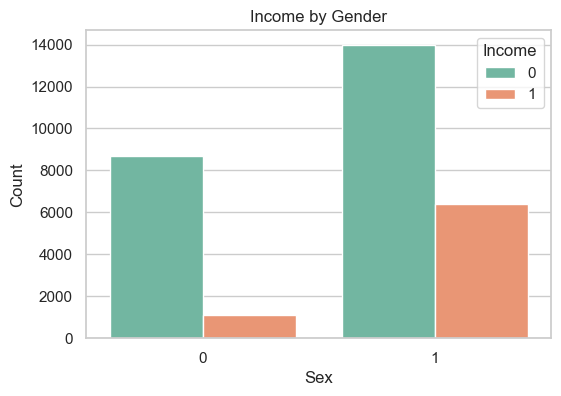

In [47]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sex', hue='income', palette='Set2')
plt.title("Income by Gender")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title="Income")
plt.show()


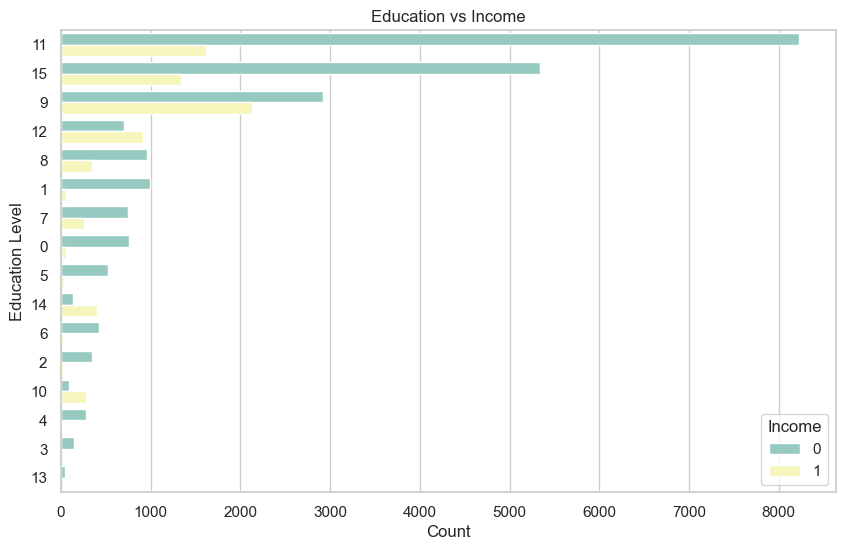

In [49]:
plt.figure(figsize=(10,6))
edu_order = df['education'].value_counts().index
sns.countplot(data=df, y='education', order=edu_order, hue='income', palette='Set3')
plt.title("Education vs Income")
plt.xlabel("Count")
plt.ylabel("Education Level")
plt.legend(title="Income")
plt.show()


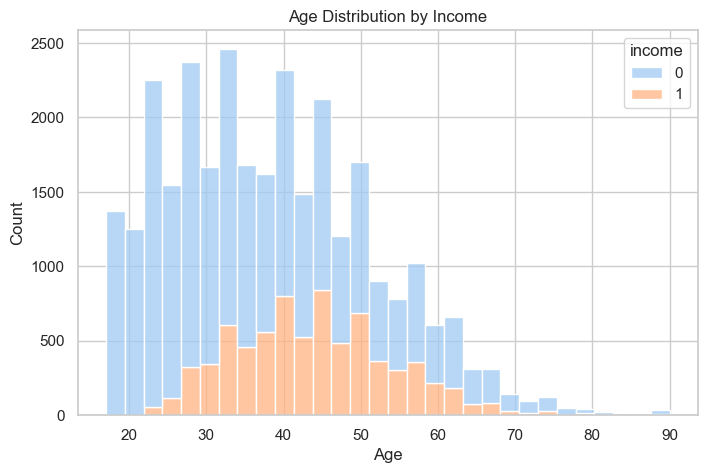

In [51]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='age', hue='income', multiple='stack', bins=30, palette='pastel')
plt.title("Age Distribution by Income")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


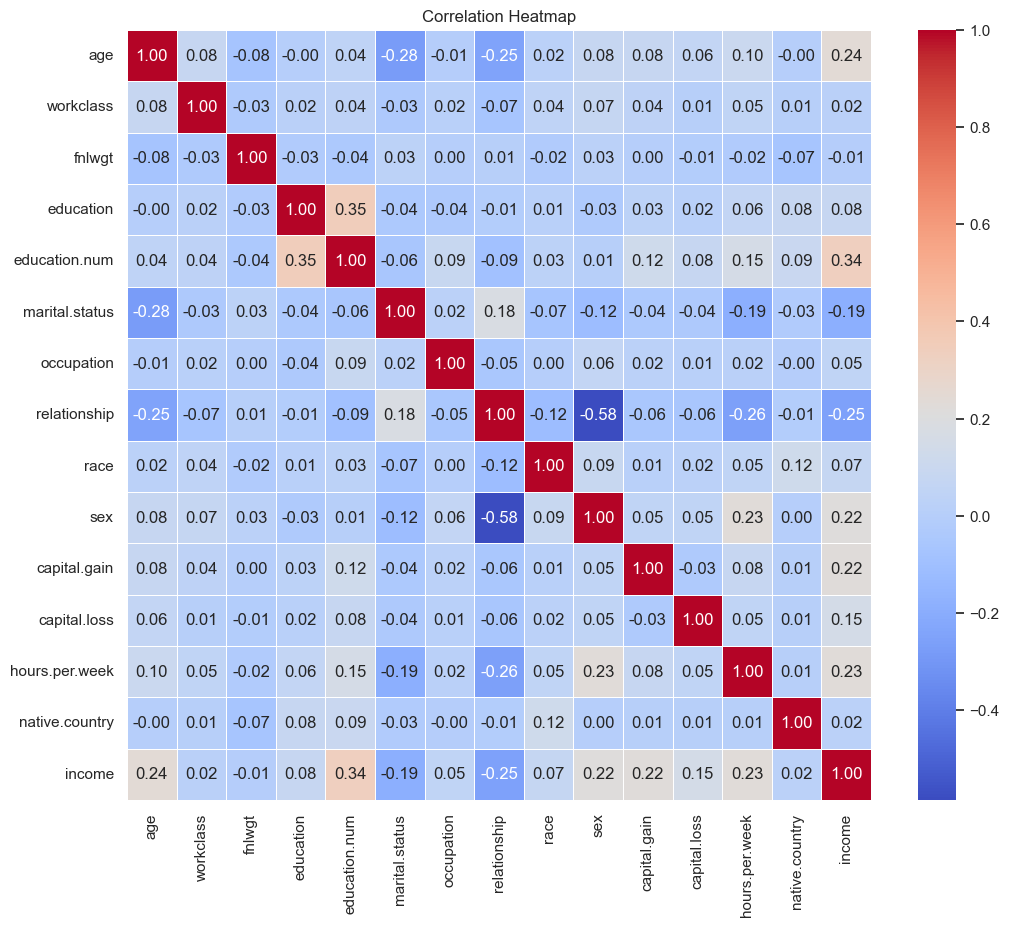

In [53]:
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [59]:
plt.savefig("Income Class Distribution.png", bbox_inches='tight')
plt.savefig("Income by Gender.png", bbox_inches='tight')
plt.savefig("Education vs Income.png", bbox_inches='tight')
plt.savefig("Age distribution by Income.png", bbox_inches='tight')
plt.savefig("Correlation Heatmap.png", bbox_inches='tight')

<Figure size 640x480 with 0 Axes>